In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
x = pd.read_csv("bird_strike.csv")
x.columns = x.columns.str.lower().str.replace(' ', '_')

In [2]:
x.duplicated().sum()

0

In [3]:
x['flightdate'] = pd.to_datetime(x['flightdate'],format='mixed') #.dt.strftime('%Y-%m-%d') column as a string
x['month'] = x['flightdate'].dt.month
x['year'] = x['flightdate'].dt.year

In [4]:
x_obj = x.select_dtypes(include=['object'])
x_obj_col = x_obj.columns

In [5]:
x_obj_col = ['airport:_name', 'altitude_bin',
       'aircraft:_make/model', 'wildlife:_number_struck',
        'flightdate', 'effect:_indicated_damage',
       'aircraft:_number_of_engines?', 'aircraft:_airline/operator',
       'origin_state', 'when:_phase_of_flight',
        'wildlife:_size', 'conditions:_sky', 'wildlife:_species',
       'pilot_warned_of_birds_or_wildlife?', 'cost:_total_$',
       'feet_above_ground', 'is_aircraft_large?']

In [6]:
for i in x_obj_col:
    x[i] = np.where(x[i].isnull(),x[i].mode(),x[i])

In [7]:
x.isnull().sum()

record_id                                      0
aircraft:_type                               129
airport:_name                                  0
altitude_bin                                   0
aircraft:_make/model                           0
wildlife:_number_struck                        0
wildlife:_number_struck_actual                 0
effect:_impact_to_flight                   23480
flightdate                                     0
effect:_indicated_damage                       0
aircraft:_number_of_engines?                   0
aircraft:_airline/operator                     0
origin_state                                   0
when:_phase_of_flight                          0
conditions:_precipitation                  23543
remains_of_wildlife_collected?                 0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4771
wildlife:_size                                 0
conditions:_sky                                0
wildlife:_species   

# Variable Description

- `Record Id`: Unique Id for the incidents 
 
- `Aircraft Type`: Type of aircraft 
 
- `Aircraft Name`: Name of aircraft

- `Altitude Bin`: Altitude of aircraft <1000 and >1000
 
- `Aircraft make Model`: Model number of aircraft 
 
- `Wildlife number struck`: Number of wildlife struck in the aircraft
 
- `Wildlife number struck actual`: Actual no. of wildlife struck
 
- `Effect impact to flight`: Effect of impact on flight 
 
- `Flight Date`: Date of flight 
 
- `Effect indicated damage`: Whether damage is caused to aircraft or not 
 
- `Aircraft no. of Engines`: No. of engines in aircraft
 
- `Aircraft Airline Operator`: Name of airline operator 
 
- `Origin State`: Origin state for the aircraft 
 
- `When phase of flight`: Phase of flight

- `Conditions Precipitation`: 

- `Remains of Wild Life Collected`: Whether wild life remains collected or not

- `Remains of Wild life send to smitsonian`: Whether wild life remains sent to Smithsonian

- `Wildlife Size`: Size of the wildlife

- `Conditions Sky`: Condition of the sky

- `Wildlife Species`: Species of the wild life

- `Pilot warned of birds or wildlife`: Whether the pilot is warned about the wildlife

- `Cost Total`: Total cost incurred due to bird strike incidents

- `Feet above ground`: Height of the plane during the incidents

-  `Number of people injured`: No. of people injured during the incidents

- `Is Aircraft large` : whether the aircraft is large or not


### Count bird strikes per year

# Univariate analysis 

In [8]:
# not_null = x['airport:_name'][~ x['airport:_name'].isnull()]

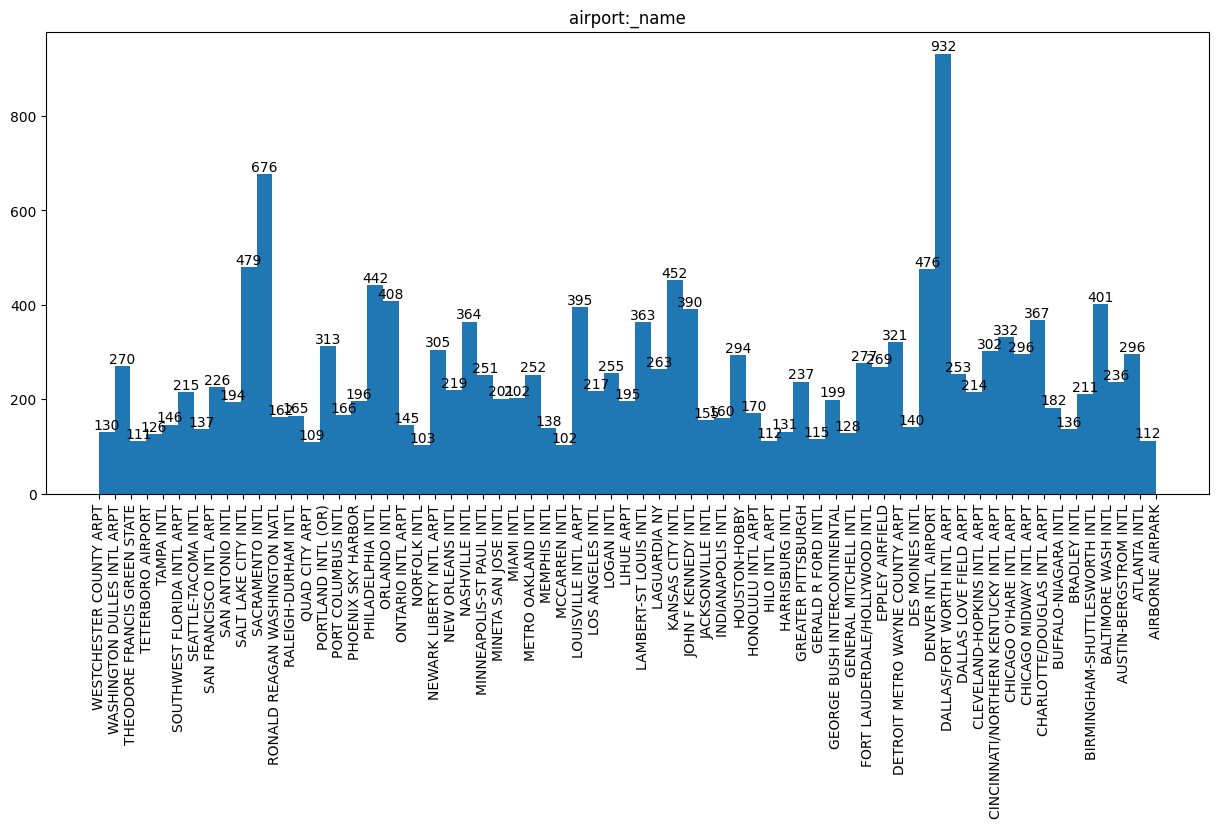

In [9]:
# Airports with more than 100 accidents 
value_counts = x['airport:_name'].value_counts()
x_ = value_counts[value_counts > 100].index
y_ = x[['airport:_name']][x['airport:_name'].isin(x_)].sort_values(by= 'airport:_name', ascending= False)
plt.figure(figsize=(15,6))
b_ = plt.hist(y_, bins = y_.nunique().values[0])
plt.bar_label(b_[2])
plt.xticks(rotation = 90)
plt.title('airport:_name')
plt.show()

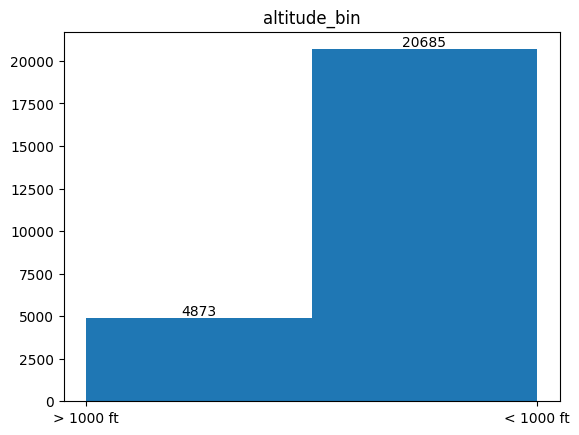

In [10]:
alti_ = x['altitude_bin']
y = plt.hist(alti_, bins = alti_.nunique())
plt.title('altitude_bin')
plt.bar_label(y[2])
plt.show()

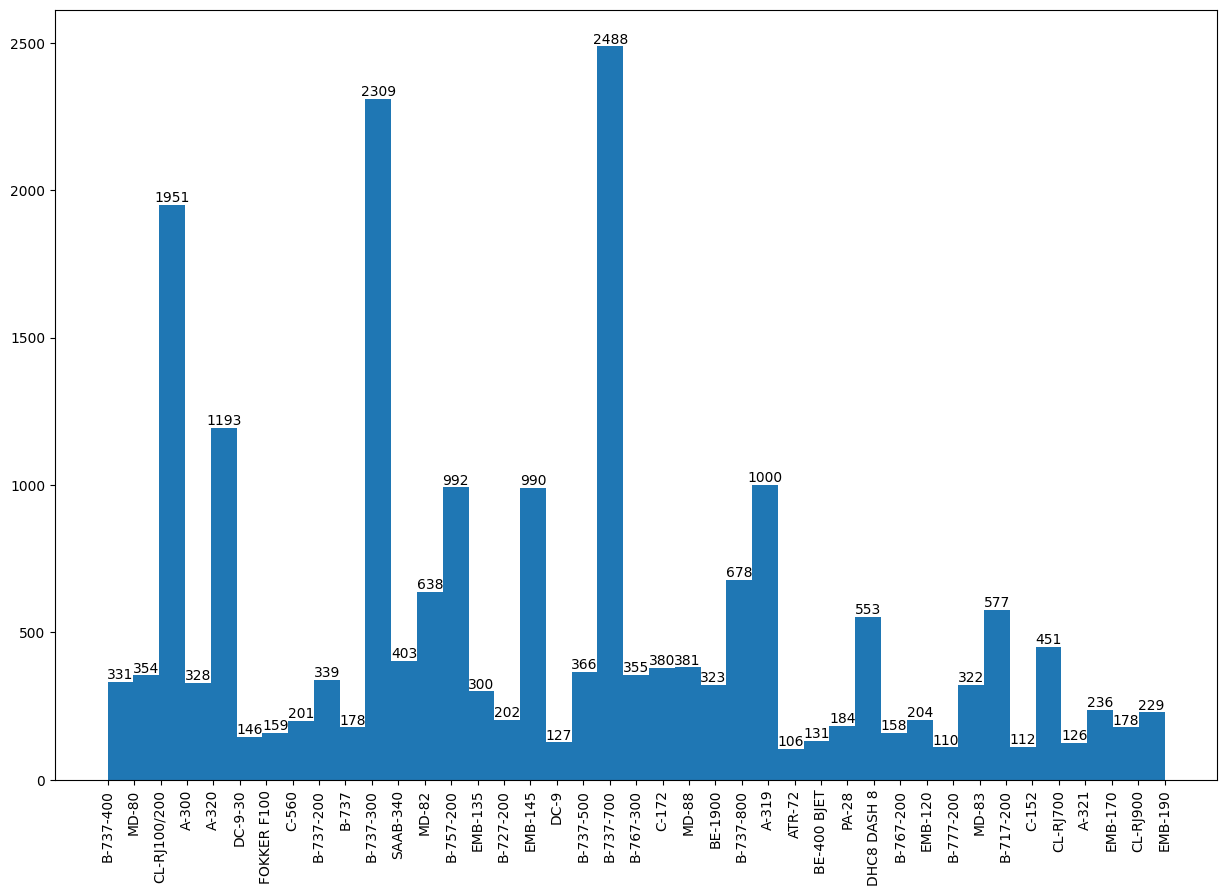

In [11]:
value_counts = x['aircraft:_make/model'].value_counts()
x_ = value_counts[value_counts > 100].index
y_ = x[['aircraft:_make/model']][x['aircraft:_make/model'].isin(x_)]
plt.figure(figsize=(15,10))
z_ = plt.hist(y_, bins = y_.nunique().values[0])
plt.bar_label(z_[2])
plt.xticks(rotation = 90)
plt.show()

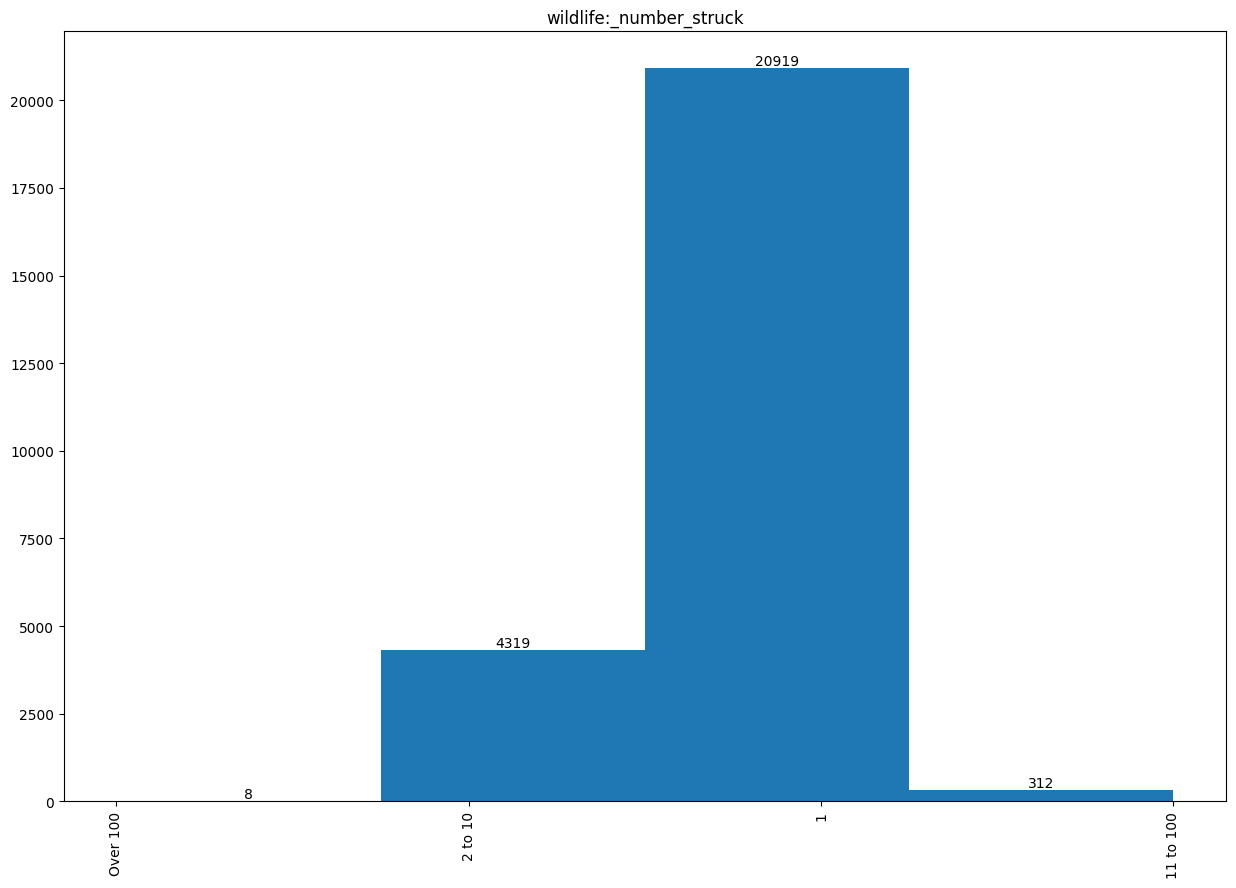

In [12]:
plt.figure(figsize=(15,10))
z_ = plt.hist(x['wildlife:_number_struck'], bins = x['wildlife:_number_struck'].nunique())
plt.bar_label(z_[2])
plt.xticks(rotation = 90)
plt.title('wildlife:_number_struck')
plt.show()

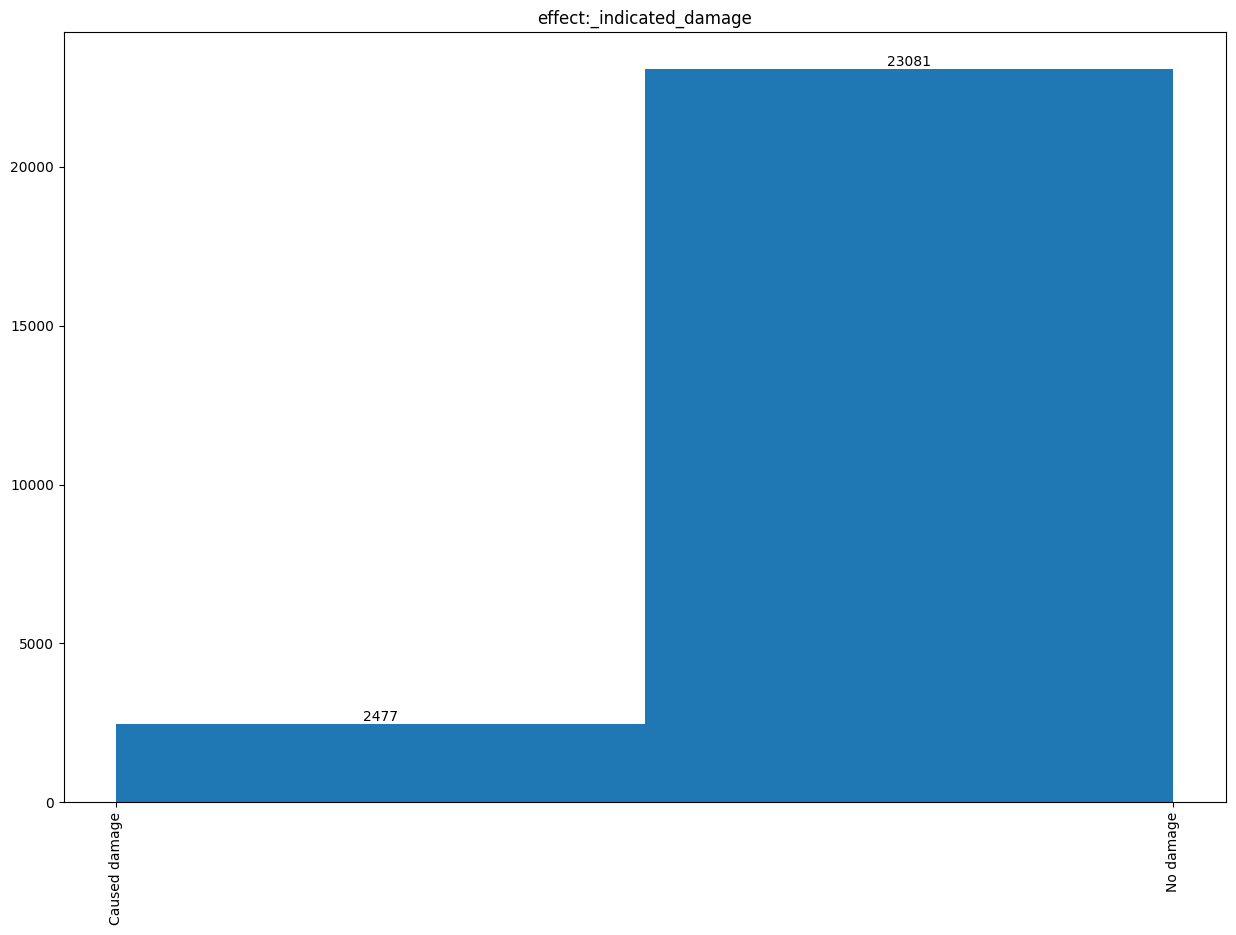

In [13]:
plt.figure(figsize=(15,10))
z_ = plt.hist(x['effect:_indicated_damage'], bins = x['effect:_indicated_damage'].nunique())
plt.bar_label(z_[2])
plt.xticks(rotation = 90)
plt.title('effect:_indicated_damage')
plt.show()

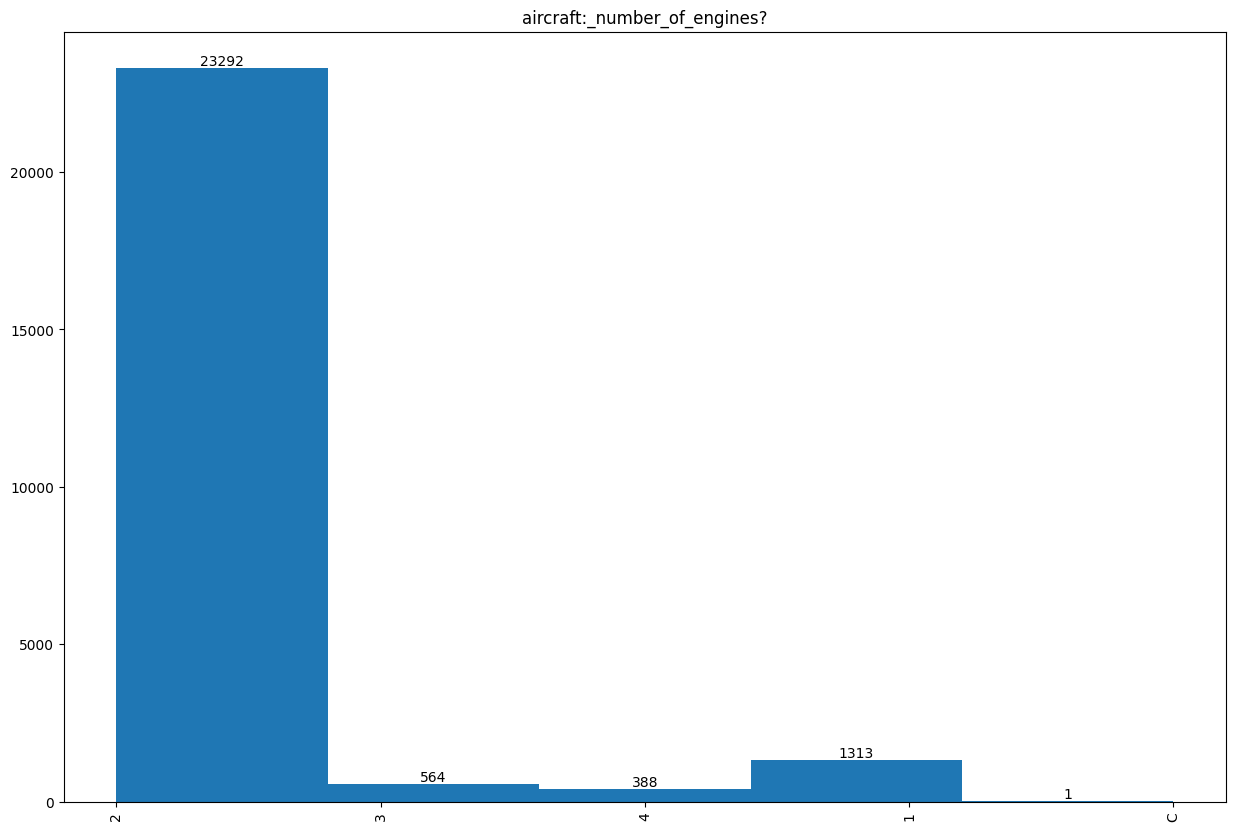

In [14]:
plt.figure(figsize=(15,10))
z_ = plt.hist(x['aircraft:_number_of_engines?'], bins = x['aircraft:_number_of_engines?'].nunique())
plt.bar_label(z_[2])
plt.xticks(rotation = 90)
plt.title('aircraft:_number_of_engines?')
plt.show()

'aircraft:_airline/operator',
 

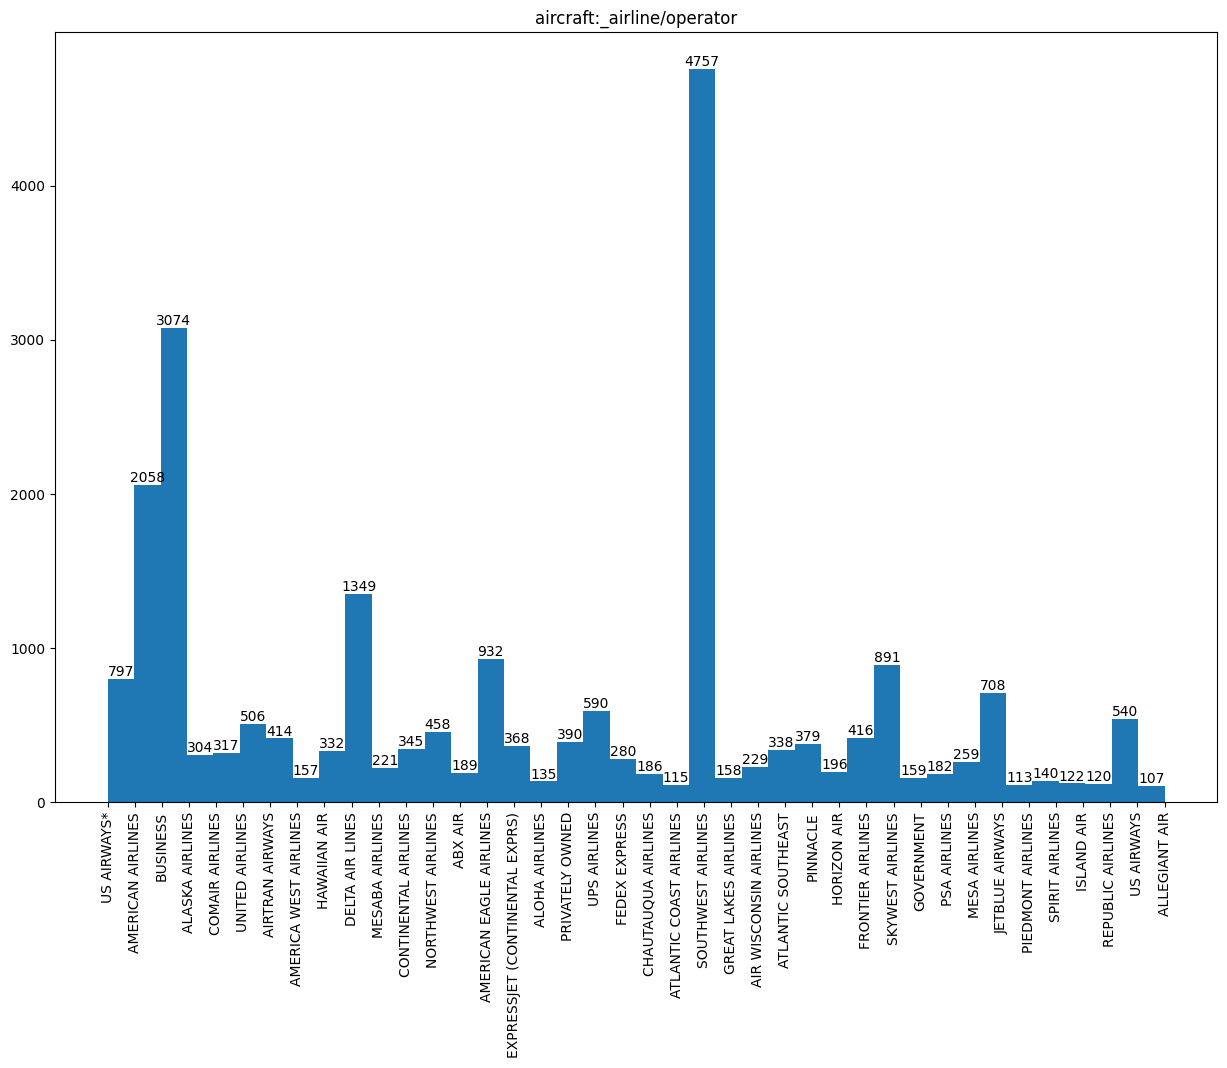

In [15]:
value_counts = x['aircraft:_airline/operator'].value_counts()
x_ = value_counts[value_counts > 100].index
y_ = x[['aircraft:_airline/operator']][x['aircraft:_airline/operator'].isin(x_)]
plt.figure(figsize=(15,10))
z_ = plt.hist(y_, bins = y_.nunique().values[0])
plt.bar_label(z_[2])
plt.xticks(rotation = 90)
plt.title('aircraft:_airline/operator')
plt.show()

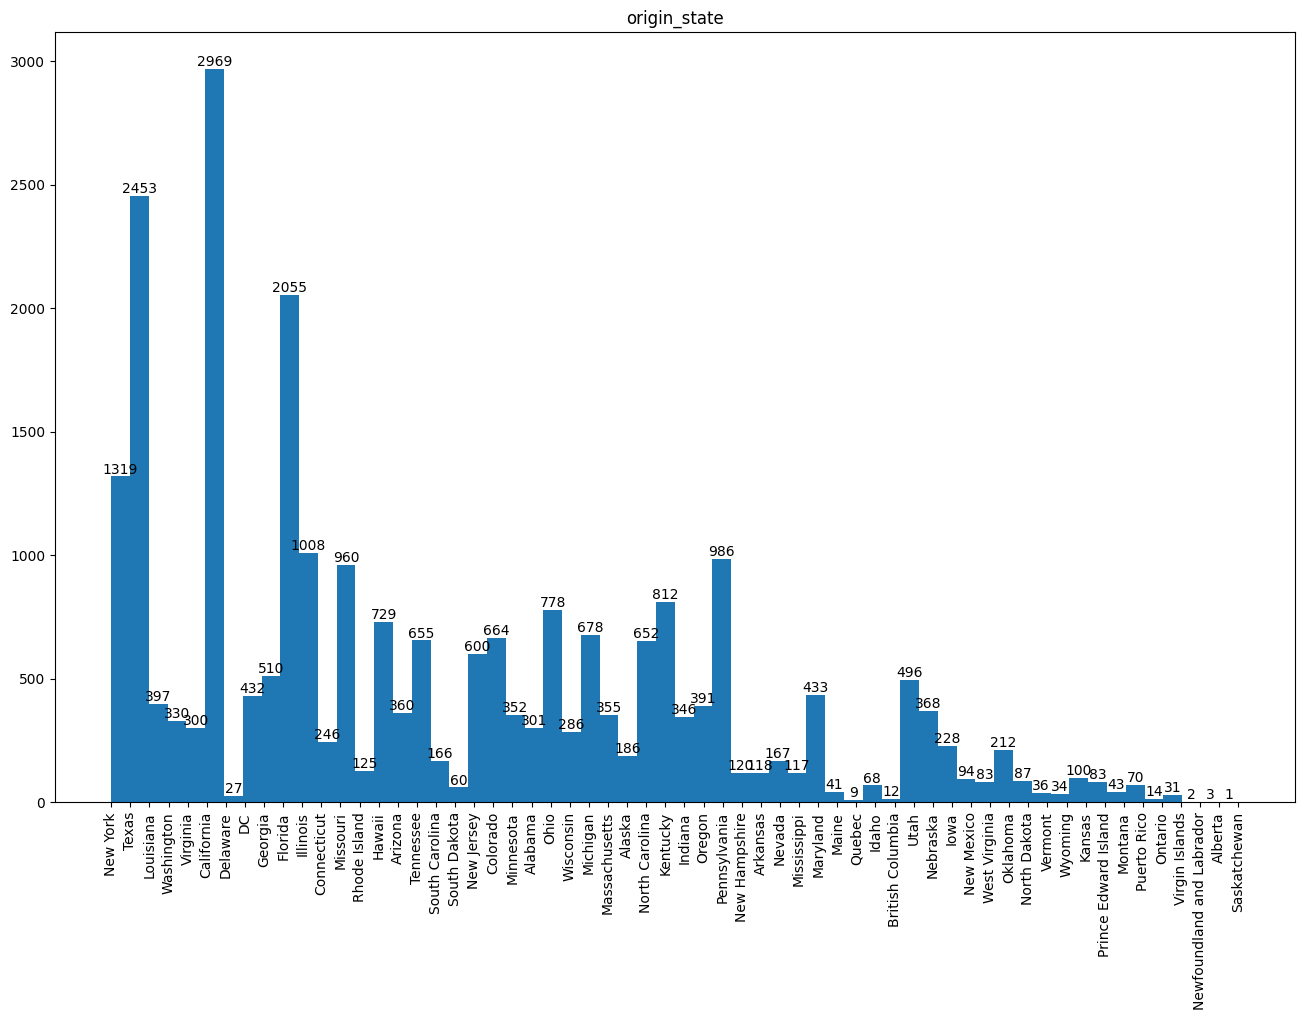

In [16]:
plt.figure(figsize=(16,10))
y = plt.hist(x['origin_state'], bins = x['origin_state'].nunique())
plt.title('origin_state')
plt.bar_label(y[2])
plt.xticks(rotation = 90)
plt.show()

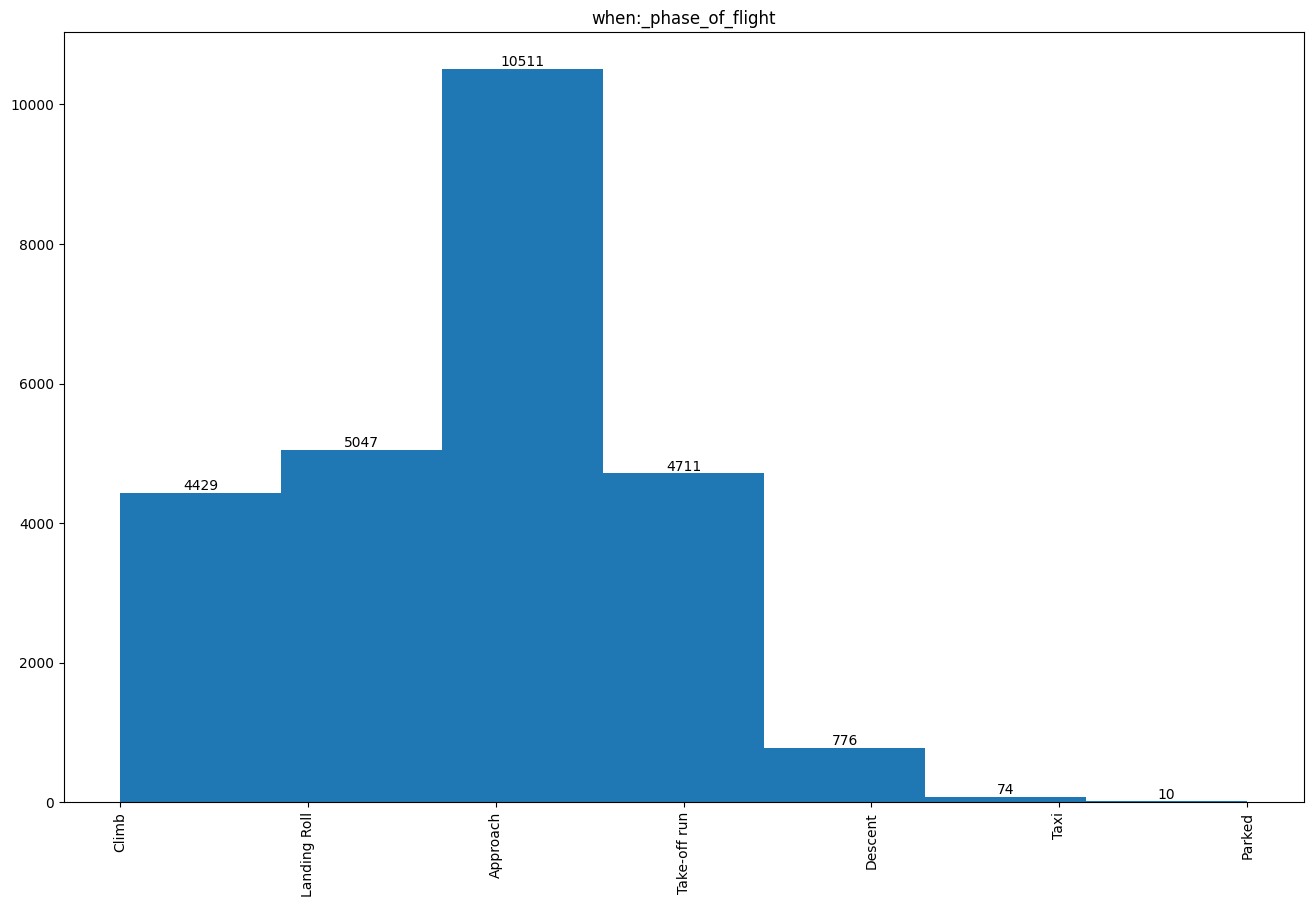

In [17]:
plt.figure(figsize=(16,10))
y = plt.hist(x['when:_phase_of_flight'], bins = x['when:_phase_of_flight'].nunique())
plt.title('when:_phase_of_flight')
plt.bar_label(y[2])
plt.xticks(rotation = 90)
plt.show()

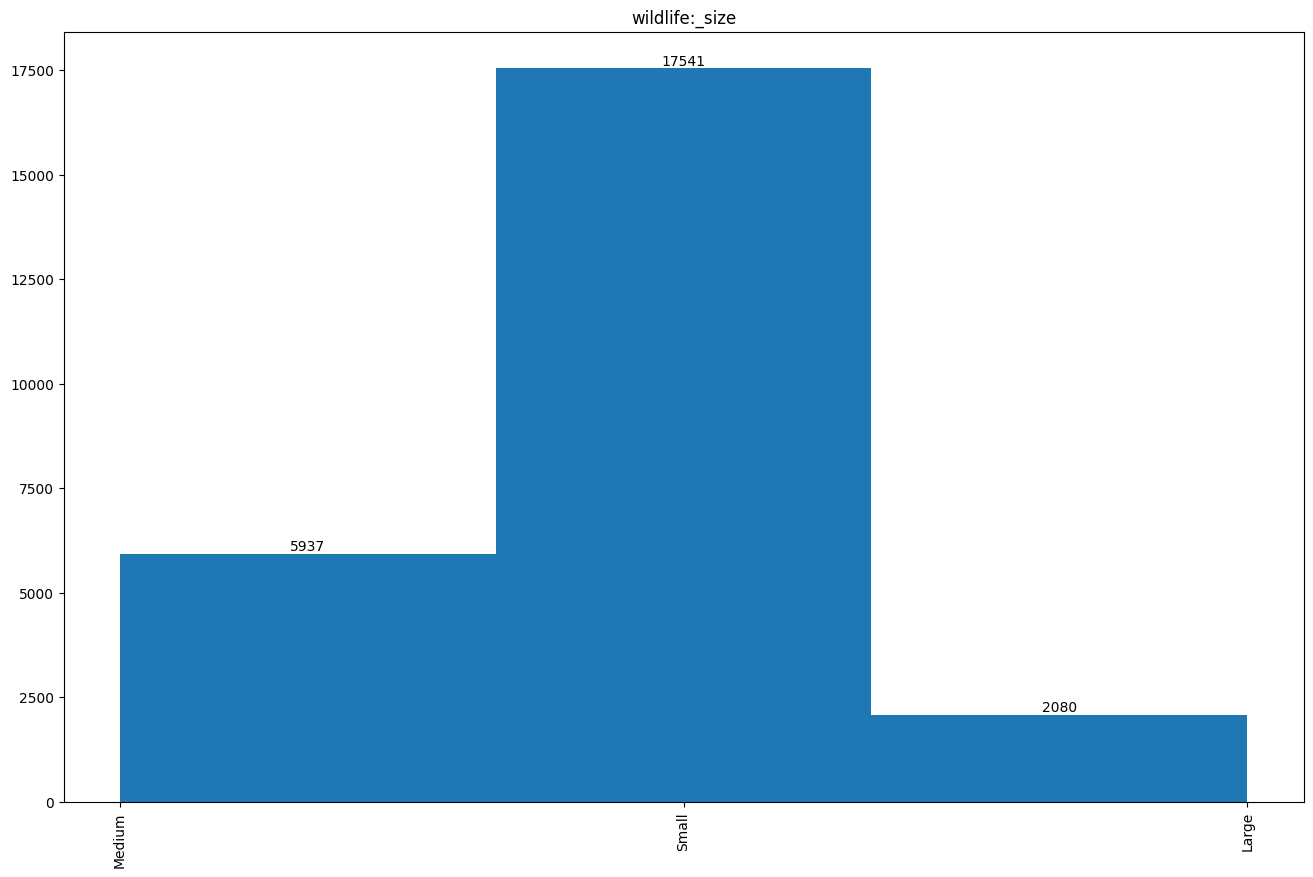

In [18]:
plt.figure(figsize=(16,10))
y = plt.hist(x['wildlife:_size'], bins = x['wildlife:_size'].nunique())
plt.title('wildlife:_size')
plt.bar_label(y[2])
plt.xticks(rotation = 90)
plt.show()

'conditions:_sky',
 

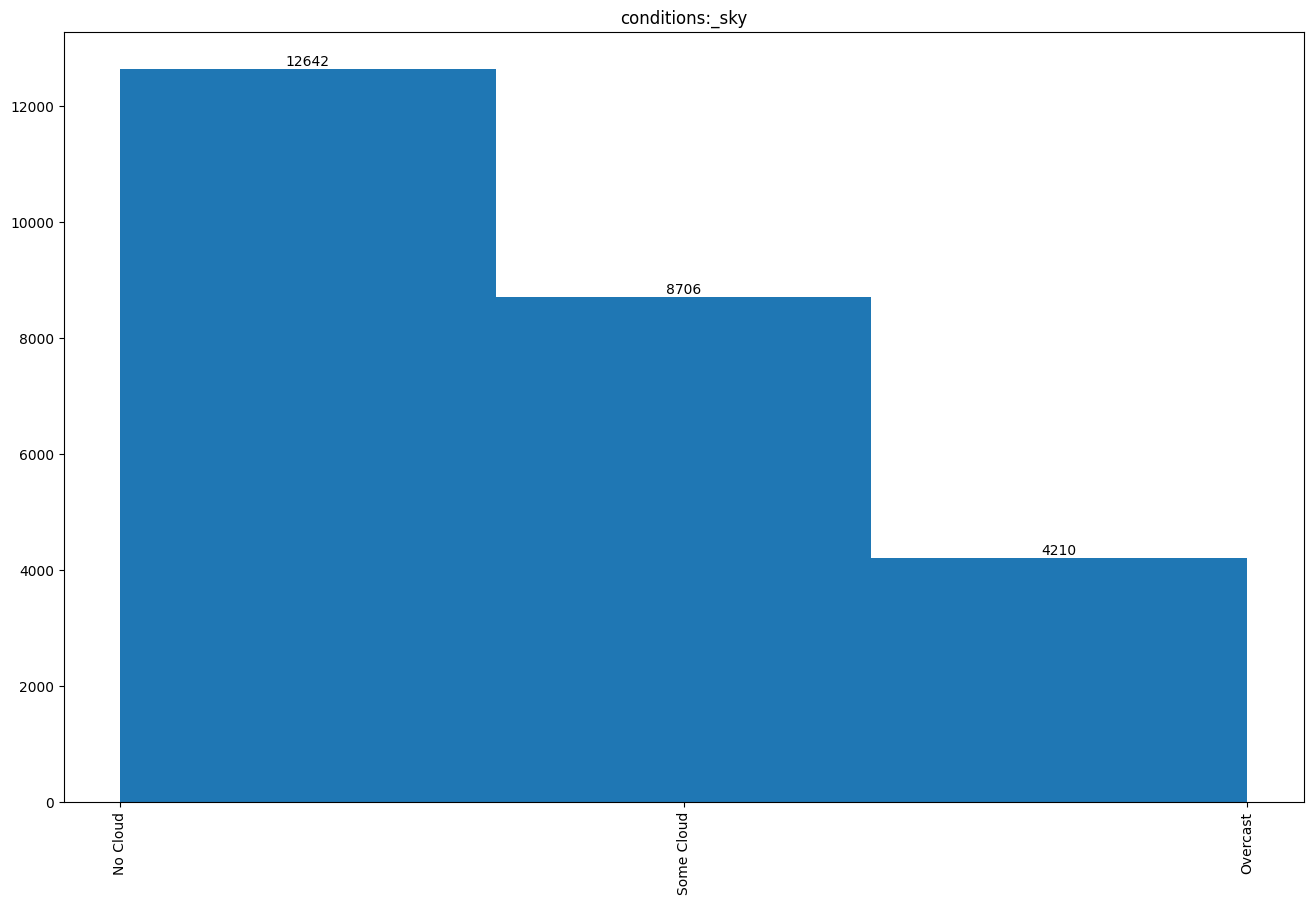

In [19]:
plt.figure(figsize=(16,10))
y = plt.hist(x['conditions:_sky'], bins = x['conditions:_sky'].nunique())
plt.title('conditions:_sky')
plt.bar_label(y[2])
plt.xticks(rotation = 90)
plt.show()

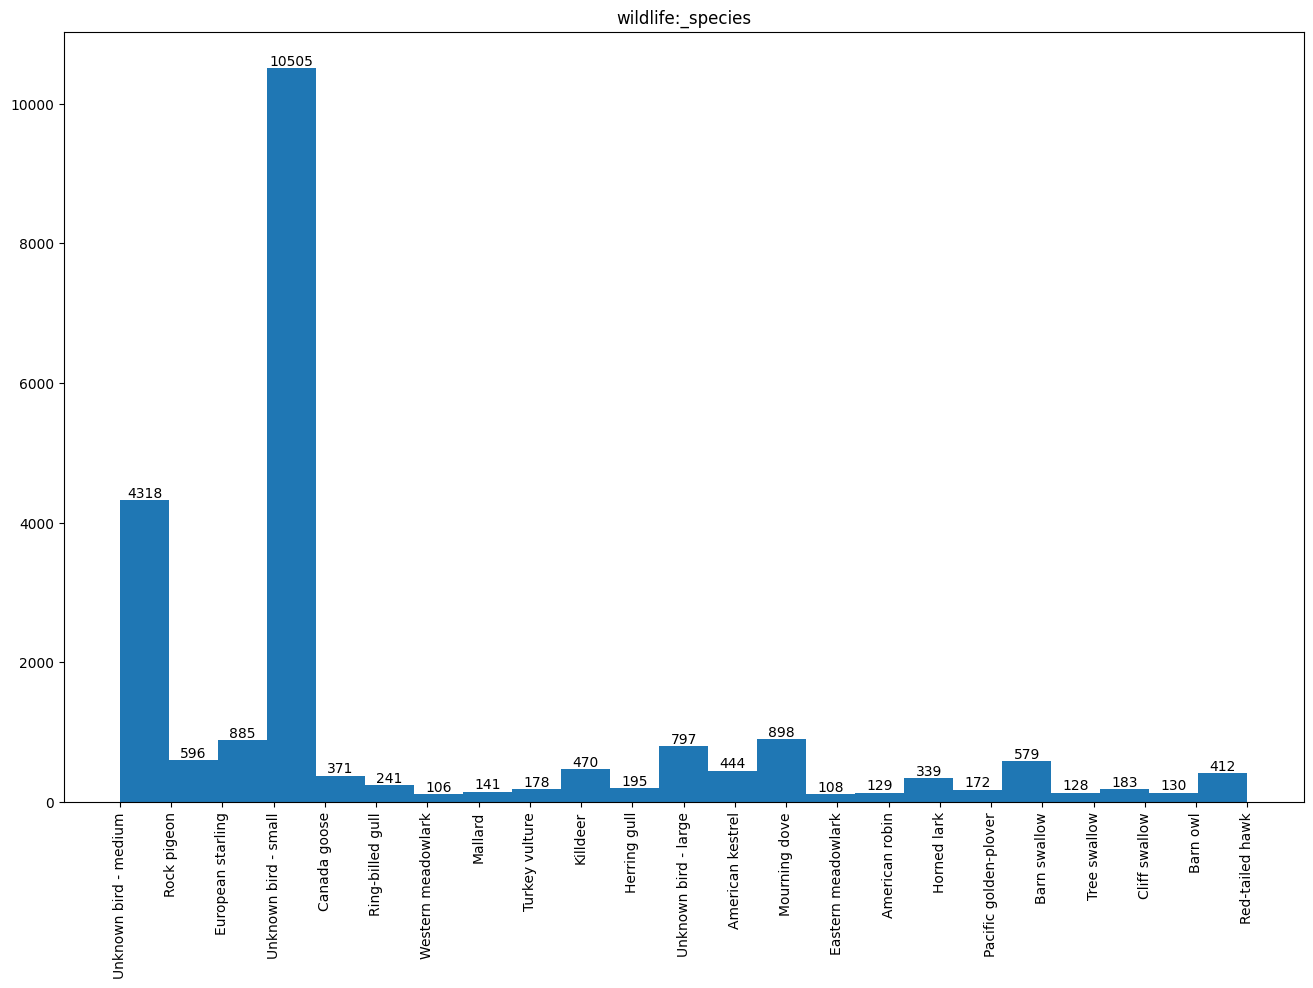

In [20]:
value_counts = x['wildlife:_species'].value_counts()
x_ = value_counts[value_counts > 100].index
y_ = x[['wildlife:_species']][x['wildlife:_species'].isin(x_)]
plt.figure(figsize=(16,10))
z = plt.hist(y_, bins = y_.nunique().values[0])
plt.title('wildlife:_species')
plt.bar_label(z[2])
plt.xticks(rotation = 90)
plt.show()

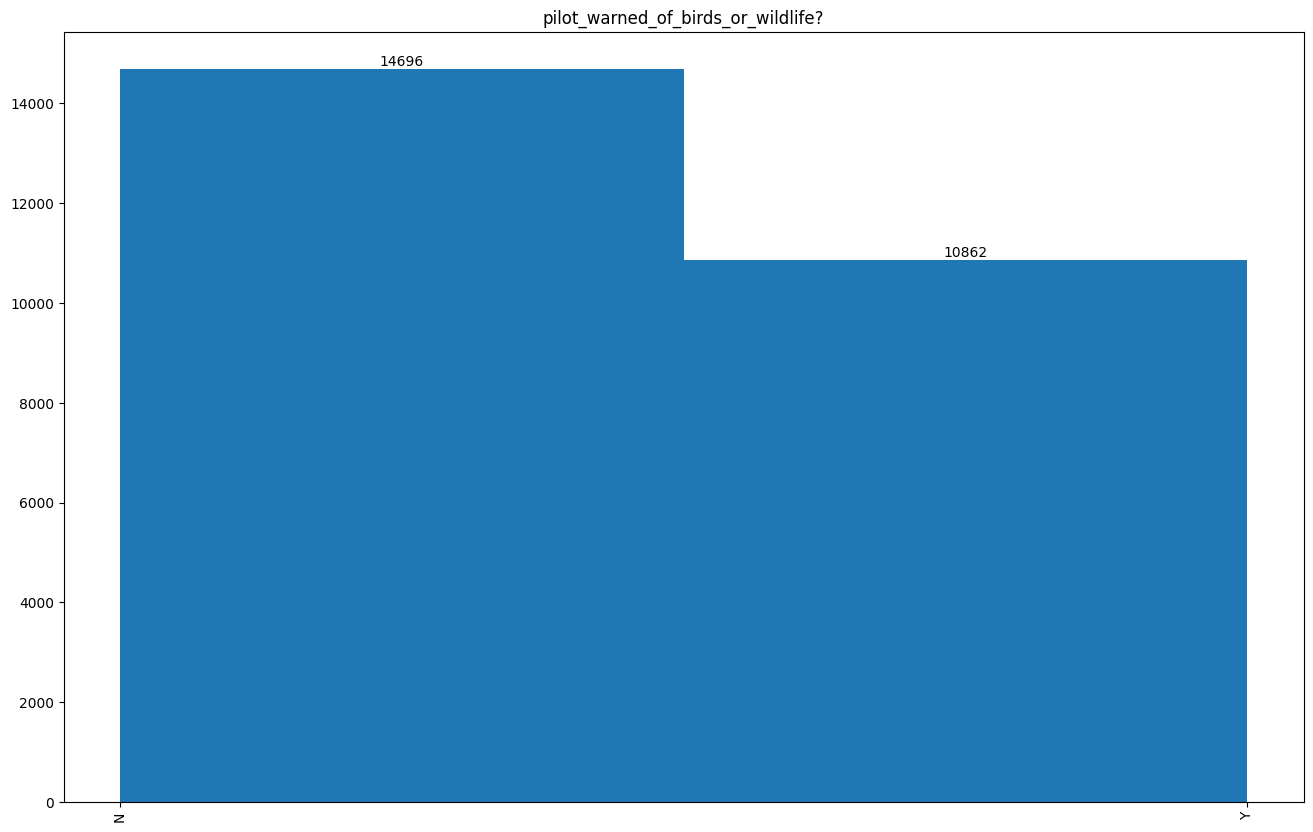

In [21]:
plt.figure(figsize=(16,10))
y = plt.hist(x['pilot_warned_of_birds_or_wildlife?'], bins = x['pilot_warned_of_birds_or_wildlife?'].nunique())
plt.title('pilot_warned_of_birds_or_wildlife?')
plt.bar_label(y[2])
plt.xticks(rotation = 90)
plt.show()

'cost:_total_$',
 'feet_above_ground',
 'is_aircraft_large?'

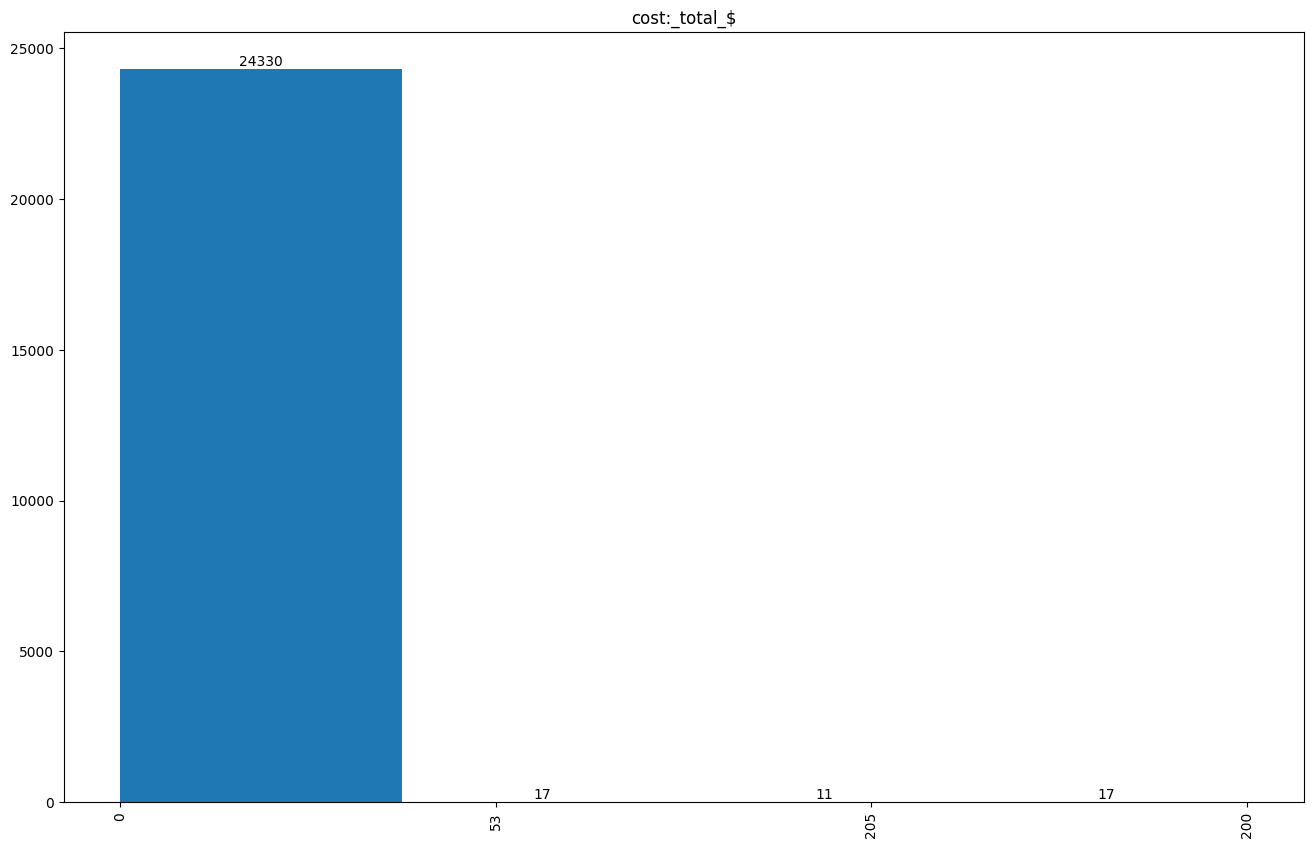

In [22]:
value_counts = x['cost:_total_$'].value_counts()
x_ = value_counts[value_counts > 10 ].index
y_ = x[['cost:_total_$']][x['cost:_total_$'].isin(x_)]
plt.figure(figsize=(16,10))
z = plt.hist(y_, bins = y_.nunique().values[0])
plt.title('cost:_total_$')
plt.bar_label(z[2])
plt.xticks(rotation = 90)
plt.show()

In [23]:
value_counts= x['feet_above_ground'].value_counts()
x_ = value_counts[value_counts > 500].index
y_ = x['feet_above_ground'][x['feet_above_ground'].isin(x_)]

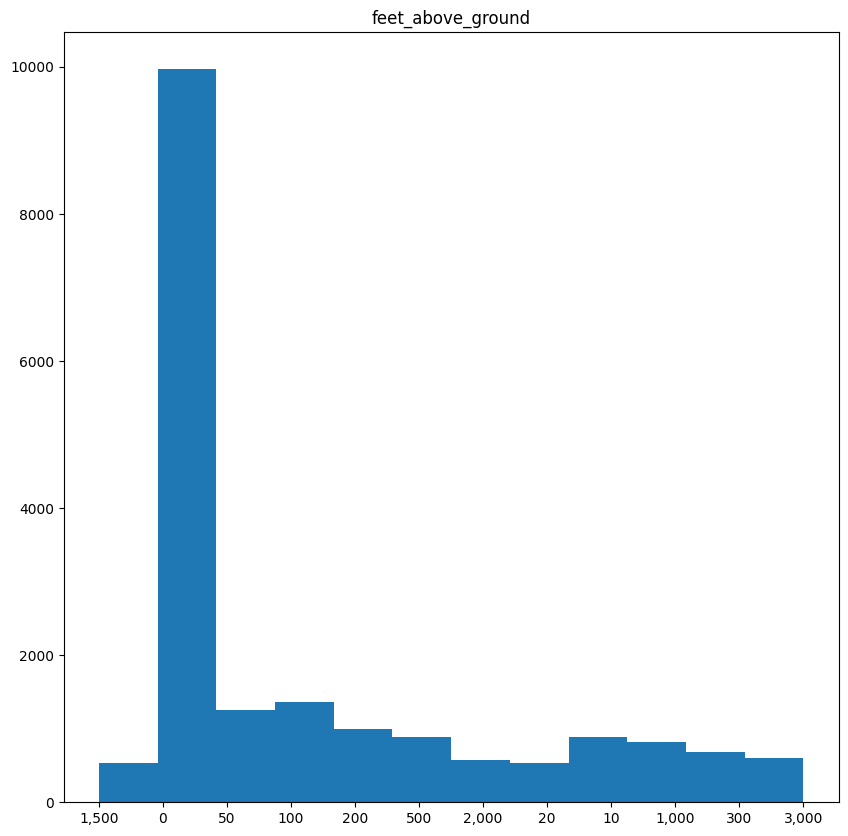

In [24]:
plt.figure(figsize = (10,10))
z_ = plt.hist(y_, bins = y_.nunique())
plt.title('feet_above_ground')
plt.show()

(array([ 8402., 17156.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

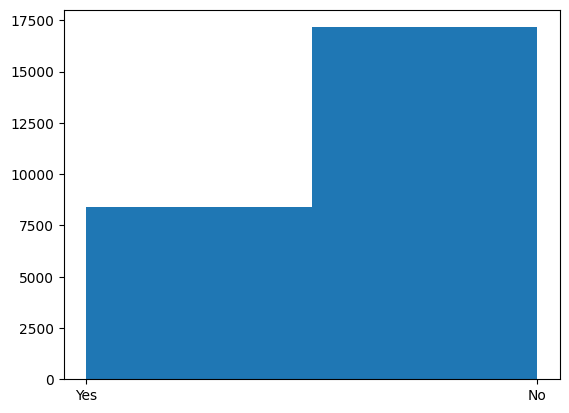

In [25]:
plt.hist(x['is_aircraft_large?'], bins = x['is_aircraft_large?'].nunique())

## Bi variate analysis 

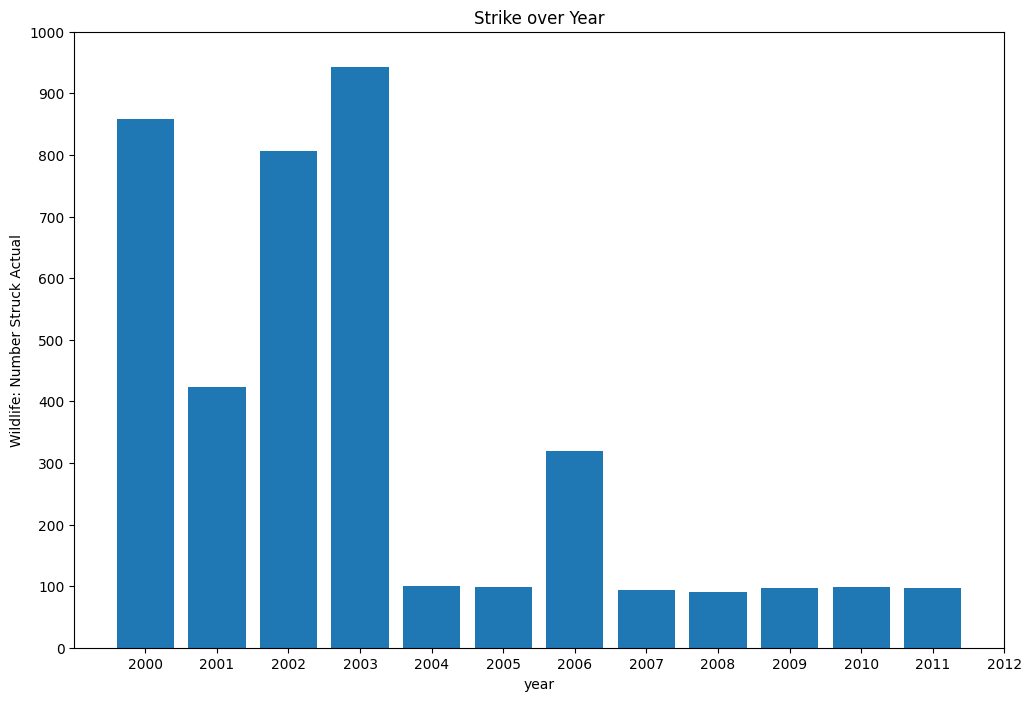

In [26]:
plt.figure(figsize=(12,8))
plt.bar(x['year'],x['wildlife:_number_struck_actual'])
plt.xlabel('year')
plt.ylabel('Wildlife: Number Struck Actual')
plt.title("Strike over Year")
plt.xticks(ticks=range(2000,2013))
max_value = x['wildlife:_number_struck_actual'].max()
plt.yticks(ticks=range(0, max_value + 100, 100))

#plt.yticks(ticks=range(100,1000),labels=[100,200,300,400,500,600,700,800,900])
plt.show()

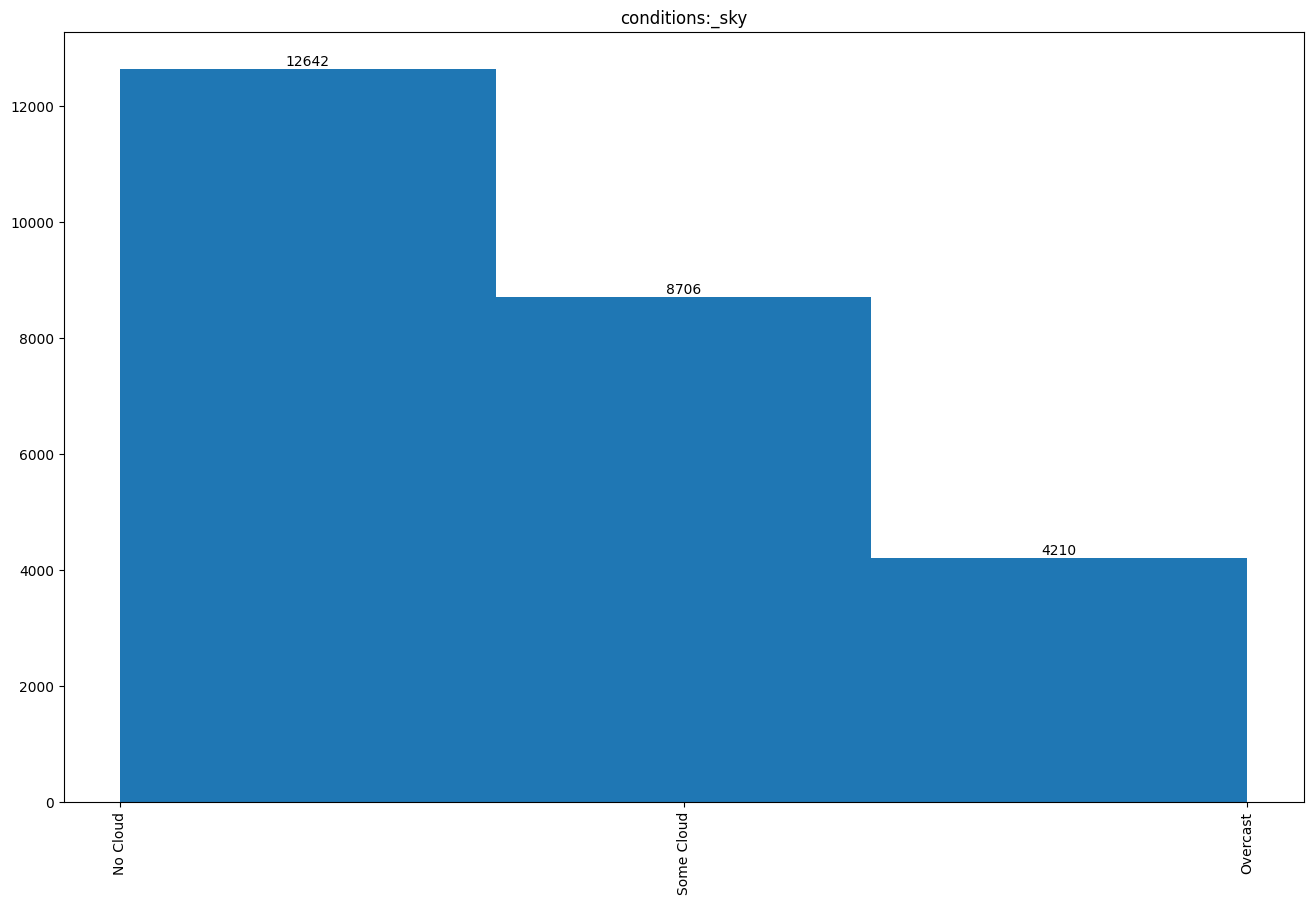

In [27]:
plt.figure(figsize=(16,10))
y = plt.hist(x['conditions:_sky'], bins = x['conditions:_sky'].nunique())
plt.title('conditions:_sky')
plt.bar_label(y[2])
plt.xticks(rotation = 90)
plt.show()

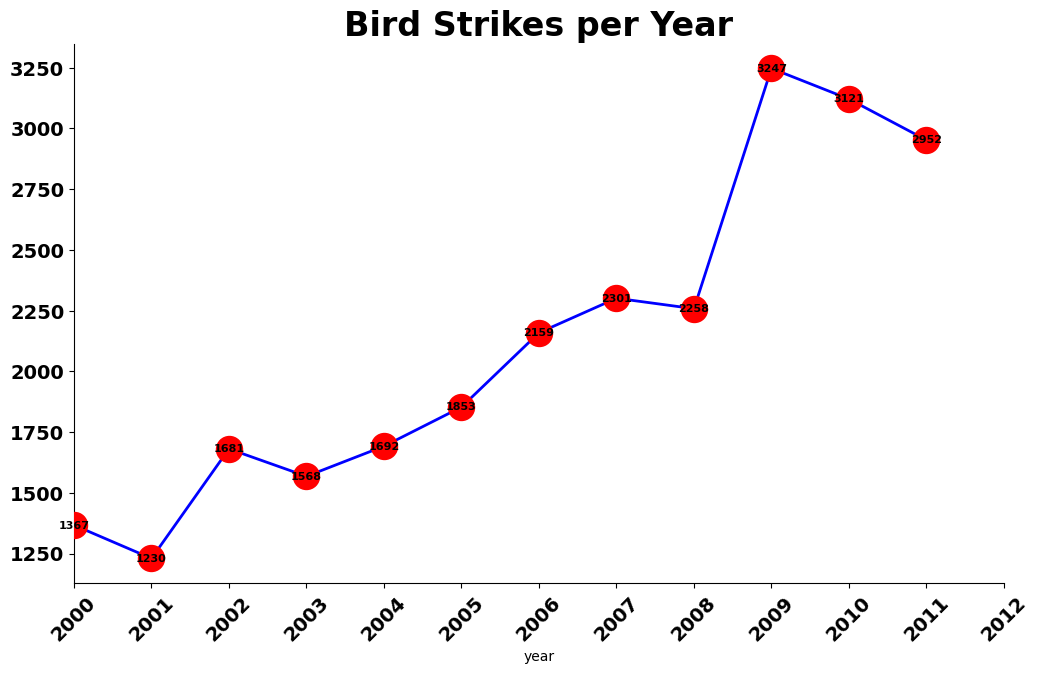

In [28]:
yearly_counts = x['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(x = yearly_counts.index, y = yearly_counts.values, color='blue', linewidth=2)
plt.scatter(yearly_counts.index, yearly_counts.values, color='red', s=350, zorder=5)

# Adding labels to the points
for i, value in enumerate(yearly_counts.values):
    plt.text(yearly_counts.index[i], value, str(value), ha='center', va='center', fontsize=8, fontweight='bold', color='black',zorder=5)

# Customizing the plot
plt.xticks(ticks=range(2000, 2013), labels=range(2000, 2013), fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')
plt.title('Bird Strikes per Year', fontsize=24, fontweight='bold')
plt.gca().set_xlim([2000, 2012])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# zorder=5 ensures that the scatter points are drawn on top of other plot elements (like line plot), making them more visible.
#ha stands for "horizontal alignment"

#plt.gca(): for "get current axis" and returns the current Axes instance on the current figure.
#.set_xlim([2000, 2011]): This sets the limits of the x-axis to the specified range, which is from 2000 to 2011 in this case.